In [61]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
# import seaborn as sb
import skimage
from skimage import io, transform, exposure
import sys
import PIL
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

BBBC038 = "/raid/data/BBBC038/"
training_imgs_dir = "/raid/data/BBBC038/training/"
# os.chdir(BBBC038)

In [45]:
def extract_features(im):
    im = skimage.exposure.rescale_intensity(im)
    color_hist = []
    for c in range(3):
        if len(im.shape) == 3:
            color_hist.append( np.histogram(im[:,:,c], 255)[0] ) # computes histogram of 255 pixel values (0 is black)
        else:
            color_hist.append( np.histogram(im[:,:], 255)[0] )
    feat = np.concatenate(color_hist)
    feat = feat / (im.shape[0] * im.shape[1] * 3 )
    return np.expand_dims(feat, axis=0)

In [46]:
def getImage(path,zoom=0.08): # redistributes intensity of an image so bright pixels are more prominent
    im = skimage.io.imread(path)
    im = skimage.exposure.equalize_adapthist(im)
    return OffsetImage(im,zoom=zoom)

# View sample image

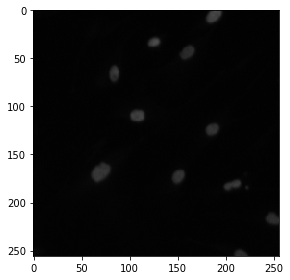

In [82]:
sample_dir = "/raid/data/BBBC038/training/ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0bdab5a00af0e18435c0/"
os.listdir(sample_dir + 'images/')
io.imshow(sample_dir + 'images/ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0bdab5a00af0e18435c0.png')
# io.imshow(getImage(sample_dir + 'images/ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0bdab5a00af0e18435c0.png'))

# Load Data

In [64]:
im_paths = []
mk_paths = []

for im_path in os.listdir(training_imgs_dir):
    path_masks = f"{training_imgs_dir}/{im_path}/masks/{im_path}"
    path_image = f"{training_imgs_dir}/{im_path}/image/{im_path}.png"

    mk_paths.append(path_masks)
    im_paths.append(path)

# sample
# io.imshow(im_path[0])


# Load Labeled Data

In [81]:
image_groups = pd.read_csv(BBBC038 + "training_classifications.csv")

lpaths = []
full_name = []
labeled = dict()

# unsure what to pull from csv
for i, image_name in image_groups.iterrows():
#     print(image_name); break
#     print(i)
    full_name.append(image_name)
    img = image_name[1]
    size = image_name[0]
    labeled[img] = size
    
image_groups[image_groups["Type"] == "Pink-Purple"]
image_groups["Type"].unique()

,Type,Image_Name
95,Pink-Purple,8f27ebc74164eddfe989a98a754dcf5a9c85ef599a1321...
96,Pink-Purple,4193474b2f1c72f735b13633b219d9cabdd43c21d9c2bb...
97,Pink-Purple,57bd029b19c1b382bef9db3ac14f13ea85e36a6053b92e...
98,Pink-Purple,87ea72894f6534b28e740cc34cf5c9eb75d0d8902687fc...


PermissionError: [Errno 13] Permission denied: '/raid/data/BBBC038/training/751f421d322940d6efe3bd570a66ecda16d08a1b90bc32a6d7ae1af89856fd49/images/'

# Identify most prominent color
* open an image, turn it into an array
* find clusters
* count color occurrences
* find most frequent color

In [24]:
from __future__ import print_function
import binascii
import struct
from PIL import Image, ImageOps
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

def id_color(image):
    print('reading image')
    im = Image.open('/Users/ebueno/Desktop/Python Stuff/skimage-tutorials/images/fingers.png')
    im = im.resize((150, 150))      # optional, to reduce time
    ar = np.asarray(im)
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding clusters')
    NUM_CLUSTERS = 5
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('cluster centres:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences

    index_max = np.argmax(counts)                    # find most frequent
    peak = codes[index_max]
    colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
    print('most frequent is %s (#%s)' % (peak, colour))
    return colour

# Identify type of cell
* convert hex to rgb values
* use rgb value to determine nearest 

In [ ]:
# Focus on unmixing purple images first!
# use separate stains (possibility)